<a href="https://colab.research.google.com/github/Yiping07/New/blob/master/%E3%80%8Clab2_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://warwick.ac.uk/study/csde/gsp/eportfolio/directory/pg/u1665958/1st.tif
!wget https://warwick.ac.uk/study/csde/gsp/eportfolio/directory/pg/u1665958/2nd.tif
!wget -O download.png https://data.kitware.com/api/v1/file/576ad39b8d777f1ecd6702f2/download
!wget https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip
!wget -O codes.zip https://bit.ly/2RhMqKt

!unzip -o -q Kather_texture_2016_image_tiles_5000.zip
!unzip -o -q codes.zip

# set the working directory to the download location
working_dir = '/content'
!ls "$working_dir"

import sys
sys.path.append(working_dir)

--2020-03-05 21:40:56--  https://data.kitware.com/api/v1/file/576ad39b8d777f1ecd6702f2/download
Resolving data.kitware.com (data.kitware.com)... 50.58.123.189
Connecting to data.kitware.com (data.kitware.com)|50.58.123.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2899365 (2.8M) [image/png]
Saving to: ‘download.png’

download.png        100%[===================>]   2.76M  5.25MB/s    in 0.5s    

2020-03-05 21:40:57 (5.25 MB/s) - ‘download.png’ saved [2899365/2899365]

--2020-03-05 21:40:58--  https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258098431 (246M) [application/octet-stream]
Saving to: ‘Kather_texture_2016_image_tiles_5000.zip.1’

Kather_texture_2016 100%[===================>] 246.14M  15.9MB/s    in 25s     

2020-03-05 21:41:24 (9.99 MB/s)

In [ ]:
# install the openslide tools in the OS
!apt-get install openslide-tools

# install the lib for python
!pip install openslide-python

# install the spams rquired for stain separation
! pip install spams 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [ ]:
import openslide as ops
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap
import skimage
from skimage import morphology
from skimage import measure
from skimage import io


# **CS904 Part III (Computational Pathology)**

## **Lab 2**
###1 - Stain Separation
###2 - Nuclei Region Segmentation.
###3 - Stain Normalization
###4 - Patch Classification using Convolutional Neural Networks (CNN)




### **Stain Separation**

Write a stain separation function that use the Ruifrok-Johnston (RJ) stain deconvolution algorithm to separate the Haematoxylin and Eosin stain channel from an image. Download *1st.tif*, which is the whole slide image of a mouse pancreatic tissue section, from the module webpage. RJ algorithm is based on optical density and stain matrix. You can use $I_{0} = 255$ and following matrix as the stain matrix.

$$M = \begin{bmatrix} 0.6443 & 0.7166 & 0.2668 \\ 0.0928 & 0.9541 & 0.2831 \\ -0.0517 & -0.1576 & 0.5482 \end{bmatrix}$$

Show the Haematoxylin and Eosin channels side by side and comment on their relation with original image and with each other.

In [ ]:
wsi_path = f'{working_dir}/1st.tif'

# read the wsi using function OpenSlide
wsi_obj = ops.OpenSlide(wsi_path)

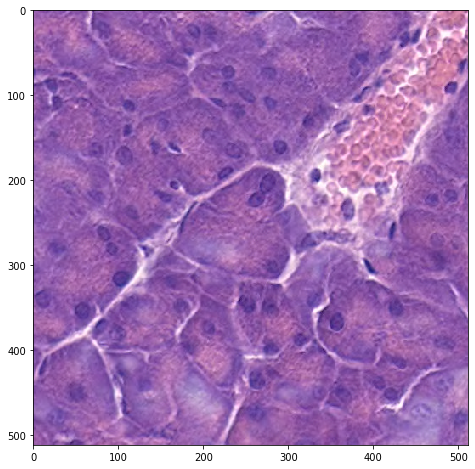

In [ ]:
# set the desired level
desired_level = 0

# base level coordinates
x_start = 400 * 64
y_start = 900 * 64

# size of the patch
patch_size = 512

# get the patch at level 0 of size 512 x 512
patch = wsi_obj.read_region((x_start, y_start), desired_level, (patch_size, patch_size))

f, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.imshow(patch)

## **Nuclei Region Segmentation**

Use the Haematoxylin channel image to identify regions containing nuclei. First, find a threshold value that gives a reasonable segmentation of the nuclear regions. Then, apply morphological operations (erdoe, dialte) to prune out noisy regions. For better visualization, compute segmentation boundaries and overlay on original image as you did in lab 1.
You don’t have to detect or accurately segment the individual nuclei, rather get a rough estimate of where the nuclei regions are in the image. 

In [ ]:
# TODO: YOUR CODE GOES HERE
# 1 - Extract the patch
# 2 - Stain seperation using stain matrix. Can use libraries e.g. skimage and histomics_tk
# 3 - Segment/Detect the nuclei

## **Sample codes for doing the stain separation, nuclei segmentation, stain normalization, and patch classification**

Here are basic stain separation, nuclei segmentation, stain normalization and patch classification codes which can be used as a baseline and to understand the underlying concepts in a programmatic manner and then you can build upon them your improved versions.

## **Stain Separation & Nuclei Segmentation**

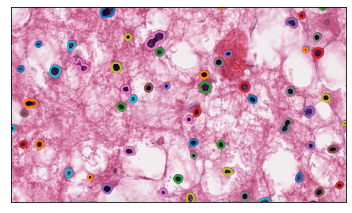

In [ ]:
# read the patch
img = skimage.io.imread(f'{working_dir}/download.png')[:,:,:3]

# image intensity
I_o = 255

# stain matrix
rgb_from_hed = np.array([[0.644211, 0.716556, 0.266844],
                         [0.092789, 0.954111, 0.283111]])

# filling out third dimension as there is just H&E
stain_matrix = np.array([*rgb_from_hed,np.cross(rgb_from_hed[0,:], rgb_from_hed[1,:])])

# do the stain seperation
output = np.reshape(-np.log10(img), (-1, 3)) @ stain_matrix

# reshape to create an image
ihc_hed = output.reshape(img.shape)

# get the Hematoxylin part and rescale it to normal grayscale
im_rgb = I_o ** (1 + ihc_hed[:, :, 0] / 255.)

# set the appropiate threshold
threshold = 247

# create the binary mask
im_rgb[im_rgb > threshold] = 255
im_rgb[im_rgb <= threshold] = 0

# removing the small objects
removed_small_objs = morphology.closing(im_rgb, morphology.disk(3))
removed_small_objs = morphology.erosion(removed_small_objs, morphology.disk(10))
removed_small_objs = morphology.dilation(removed_small_objs, morphology.disk(5))

# find the contours in the mask and apply on orignal image
contours = measure.find_contours(removed_small_objs, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## **Stain Normalization**

Stain normalisation in modern digital pathology is an important processing function in computer-aided diagnostic (CAD) systems. This function minimizes the differences in colour and intensity present in stained images from different laboratories and makers. Reinhard method's **normalizing** the stain colour distribution according to some **reference** image

For more information: https://drive.google.com/file/d/1gSghhOkIR43kf1vq3NtJ49tLS0npjakH/view?usp=sharing

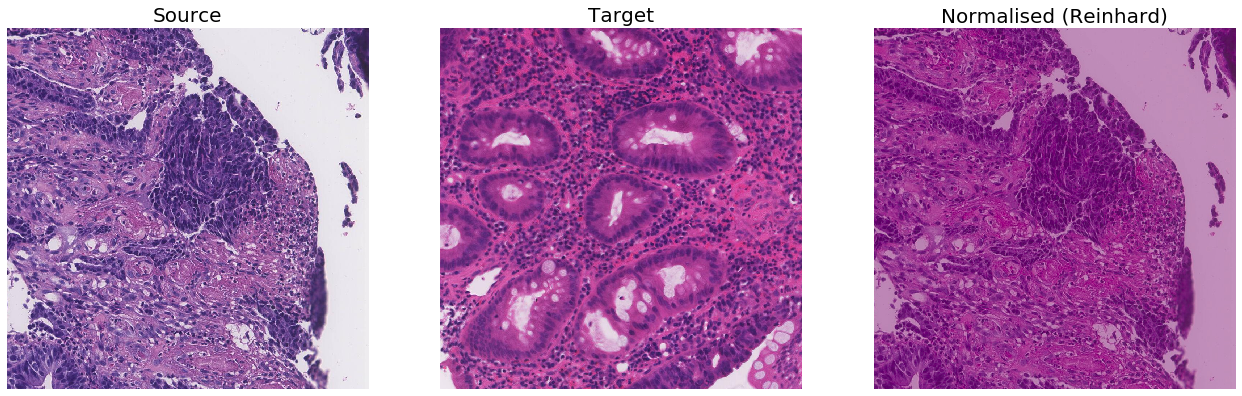

In [ ]:
# import libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import cv2
import spams

from stainnorm.stain_extractor import get_stain_matrix
from stainnorm.utils import *

image_path = 'data/images'

# read the list of images 
files_list = glob.glob(image_path + '/*') # get list of files in directory
num_images = len(files_list)

# read the images using opencv and convert the images to RGB format
images_list = []
for idx in range(num_images):
    image_temp = cv2.imread(files_list[idx])
    image_temp = cv2.cvtColor(image_temp, cv2.COLOR_BGR2RGB)
    images_list.append(image_temp)


# convert the images into gray scale
gray_list = []
for idx in range(num_images):
    image_lowres = images_list[idx]
    image_lowres = np.array(image_lowres) # convert to numpy array
    tmp = cv2.cvtColor(image_lowres, cv2.COLOR_RGB2GRAY)
    gray_list.append(255-cv2.cvtColor(image_lowres, cv2.COLOR_RGB2GRAY))


# create the tissue masks
global_thresh = '50'
thresh_list1 = []
for idx in range(num_images):
    images_gray = gray_list[idx]
    images_thresh = images_gray.copy()
    images_thresh[images_thresh > int(global_thresh)] = 255
    images_thresh[images_thresh <= int(global_thresh)] = 0
    thresh_list1.append(images_thresh)


# util function for extracting the random patchs from the big images like these 
source_patch = extract_random_patches(images_list[0], thresh_list1[0], n_patches=1, patch_size=1000, tissue_cutoff=0.75)
source_patch = source_patch[0]
target_patch = extract_random_patches(images_list[1], thresh_list1[1], n_patches=1, patch_size=1000, tissue_cutoff=0.75)
target_patch = target_patch[0]


# perform reinhard stain normalisation
reinhard_patch = reinhard_norm(source_patch, target_patch)

# plot the output: source patch, target patch, normalised patch
plot_figs([source_patch, target_patch, reinhard_patch], ['Source', 'Target', 'Normalised (Reinhard)'])

## **Patch Classification**

Image classification is a common task in computational pathology and machine learning in general. Image classification is predicting a label (also called the class) for a given image.

Training most machine learning models involves a few main steps:

1. Aquiring and preparing data.
2. Loading data.
3. Training a model (AKA fitting the model to the data).
4. Evaluating the model predictions (AKA inference).

Data is usually split into two sets: training and validation.

For more information: http://tinyurl.com/0-to-ai-in-10

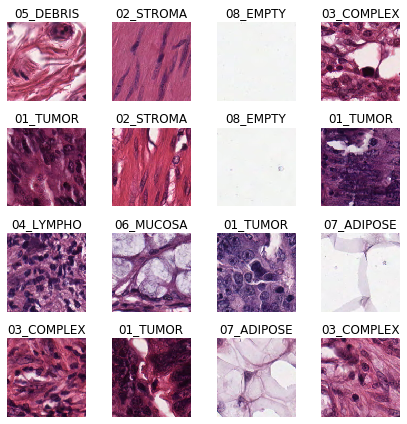

In [ ]:
# Import The fast.ai Module & Load The Dataset
from fastai.vision import *
data = ImageDataBunch.from_folder('Kather_texture_2016_image_tiles_5000', valid_pct=0.2, seed=123)
data.show_batch(rows=4, figsize=(6,6))

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.822663,0.548348,0.831000,00:58
1,0.580730,0.549487,0.834000,00:58
2,0.475706,0.513834,0.841000,00:58
3,0.396624,0.510830,0.853000,00:58
4,0.379047,0.519055,0.851000,00:58


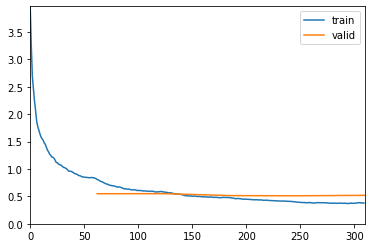

In [ ]:
# Train The Model
learn = cnn_learner(data, models.alexnet, metrics=accuracy, callback_fns=ShowGraph)
learn.fit(5)

tensor(0.8510)


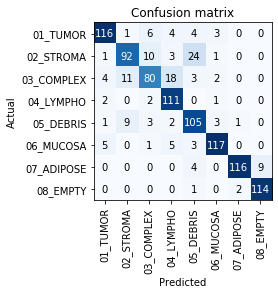

In [ ]:
# Plot A Confusion Matrix
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
print(accuracy(preds, y)) # Same as accuracy in table from previous cell
interp.plot_confusion_matrix()

In [ ]:
# TODO: YOUR CODE GOES HERE

# 1- Apply stain normalization on the patches by choosing a source patch from 1st.tif and apply on the patches of 2nd.tif 
# 2- Try different models availabe in the fast.ai model zoo

## **References**

1. https://openslide.org/api/python/
2. https://opencv.org/
3. https://scikit-image.org/
4. https://hackmd.io/@r1Fblb_BQgeEQi_ZHSYnsg/SJ7o7pk1N?type=view
5. https://www.fast.ai/
6. https://jnkather.github.io/datasets/
7. http://tinyurl.com/0-to-ai-in-10
8. https://github.com/DigitalSlideArchive/HistomicsTK
